 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
dropped_whale_df = whale_df.dropna()
dropped_whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
dropped_algo_df = algo_df.dropna()
dropped_algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
new_sp500_df = sp500_df[['Close']].replace( '[\$,)]','', regex=True ).astype(float)
new_sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
new_sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_returns = new_sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
dropped_sp500_df = sp500_returns.dropna()
dropped_sp500_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
dropped_sp500_df.columns

Index(['Close'], dtype='object')

In [15]:
# Rename `Close` Column to be specific to this portfolio.
dropped_sp500_df.rename(columns={'Close':'S&P Return'}, inplace=True)
dropped_sp500_df.head()

C:\Users\fifab\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,S&P Return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([dropped_whale_df, dropped_algo_df, dropped_sp500_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [66]:
# Plot daily returns of all portfolios
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


Text(0, 0.5, 'Daily Returns')

<Figure size 3600x2880 with 0 Axes>

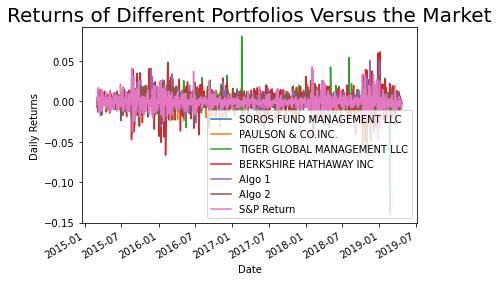

In [18]:
plt.figure(figsize=(50,40))
combined_df.plot(legend=True)
plt.title("Returns of Different Portfolios Versus the Market", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Daily Returns")

#### Calculate and Plot cumulative returns.

Text(0, 0.5, 'Cumulative Daily Returns')

<Figure size 1440x720 with 0 Axes>

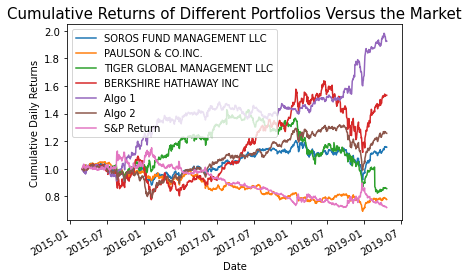

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
plt.figure(figsize=(20,10))
cumulative_returns.plot(legend=True)
plt.title("Cumulative Returns of Different Portfolios Versus the Market", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Cumulative Daily Returns")

In [20]:
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0, 0.5, 'Daily Returns')

<Figure size 1440x720 with 0 Axes>

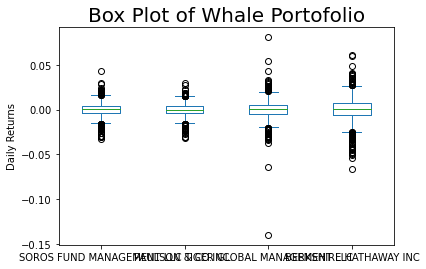

In [21]:
# Box plot to visually show risk
plt.figure(figsize=(20,10))
dropped_whale_df.plot.box(legend=True)
plt.title('Box Plot of Whale Portofolio', fontsize=20)
plt.ylabel('Daily Returns')

Text(0, 0.5, 'Daily Returns')

<Figure size 1440x720 with 0 Axes>

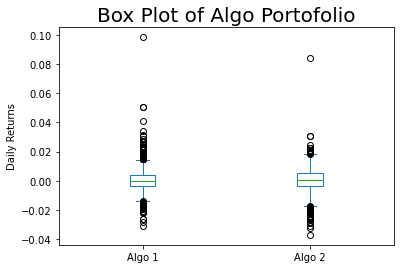

In [22]:
plt.figure(figsize=(20,10))
dropped_algo_df.plot.box(legend=True)
plt.title('Box Plot of Algo Portofolio', fontsize=20)
plt.ylabel('Daily Returns')

Text(0, 0.5, 'Daily Returns')

<Figure size 1440x720 with 0 Axes>

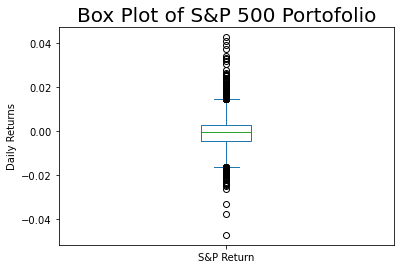

In [23]:
plt.figure(figsize=(20,10))
dropped_sp500_df.plot.box(legend=True)
plt.title('Box Plot of S&P 500 Portofolio', fontsize=20)
plt.ylabel('Daily Returns')

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
risk_whale = dropped_whale_df.std()
risk_algo = dropped_algo_df.std()
risk_sp500 = dropped_sp500_df.std()

print('Standard Deviation of Whale Portfolios: ', '\n',risk_whale)
print('Standard Deviation of Algo Portfolio: ', '\n',risk_algo)
print('Standard Deviation of S&P 500 Portfolio: ', '\n',risk_sp500)

Standard Deviation of Whale Portfolios:  
 SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Standard Deviation of Algo Portfolio:  
 Algo 1    0.007988
Algo 2    0.008466
dtype: float64
Standard Deviation of S&P 500 Portfolio:  
 S&P Return    0.008135
dtype: float64


In [25]:
combined_risk = combined_df.std()
combined_risk

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P Return                     0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate  the daily standard deviation of S&P 500
daily_risk = dropped_sp500_df['S&P Return'].std()
daily_risk
# Determine which portfolios are riskier than the S&P 500
x=list(combined_risk)

if x < list([daily_risk]):
    print('These portolios are riskier:', '\n', x)
    

These portolios are riskier: 
 [0.007896188745252348, 0.007025515427605775, 0.010897305414583355, 0.012918753062201797, 0.007622690854822048, 0.008341234467834717, 0.00858688974707399]


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
combined_risk = combined_df.std()
annualized_std = combined_risk * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P Return                     0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

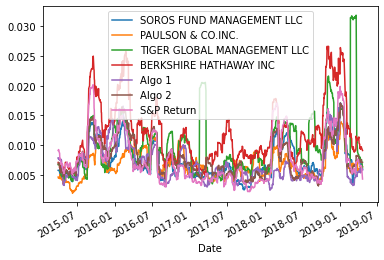

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
return_correlation = combined_df.corr()
# Display de correlation matrix
return_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [30]:
# Calculate covariance of a single portfolio
covariance = algo_df['Algo 1'].cov(algo_df['Algo 2'])
print('Covariance of Algo portfolio:', covariance)
# Calculate variance of S&P 500
variance = dropped_sp500_df['S&P Return'].var()
print('Variance of S&P returns:' , variance)
# Computing beta
algo_beta = covariance / variance
print('Beta of Algo portfolio to market:', algo_beta)
# Plot beta trend

Covariance of Algo portfolio: 2.343757568479776e-05
Variance of S&P returns: 6.617241051948298e-05
Beta of Algo portfolio to market: 0.3541895406378931


In [31]:
rolling_covariance = algo_df['Algo 1'].rolling(window=60).cov(dropped_sp500_df['S&P Return'])
rolling_variance = dropped_sp500_df['S&P Return'].rolling(window=60).var()

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo Portfolio'}, xlabel='Date'>

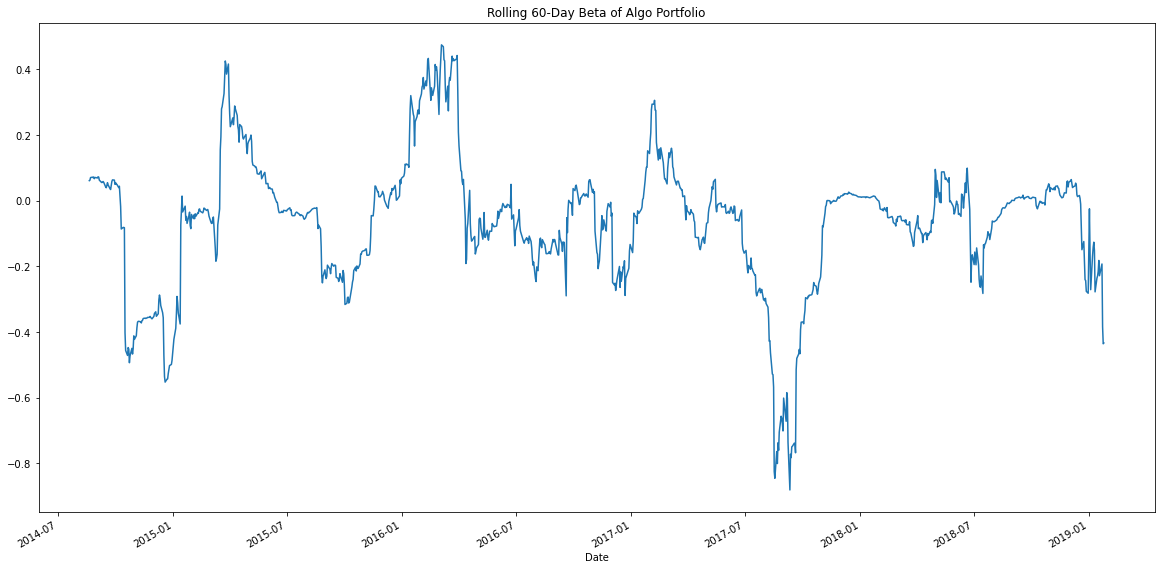

In [32]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo Portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-combined_df['S&P Return'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P Return                     0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

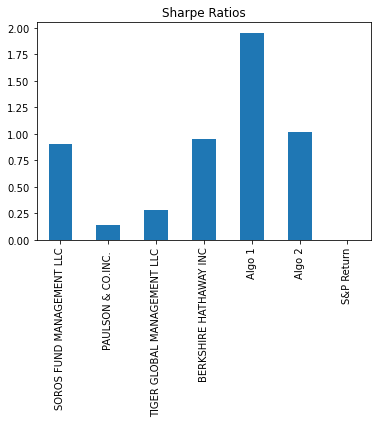

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [36]:
# Reading data from 1st stock
nflx_df = pd.read_csv('NFLX_data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
nflx_df.head()

,Close
Date,
2017-09-20 16:00:00,185.51
2017-09-21 16:00:00,188.78
2017-09-22 16:00:00,187.35
2017-09-25 16:00:00,178.55
2017-09-26 16:00:00,179.38


In [37]:
# Reading data from 2nd stock
nvda_df = pd.read_csv('NVDA_data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda_df.head()

,Close
Date,
2017-09-20 16:00:00,46.46
2017-09-21 16:00:00,45.19
2017-09-22 16:00:00,44.75
2017-09-25 16:00:00,42.75
2017-09-26 16:00:00,42.99


In [38]:
# Reading data from 3rd stock
tsla_df = pd.read_csv('TSLA_data.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_df.head()

,Close
Date,
2017-09-20 16:00:00,74.78
2017-09-21 16:00:00,73.30
2017-09-22 16:00:00,70.22
2017-09-25 16:00:00,69.00
2017-09-26 16:00:00,69.05


In [39]:
# Combine all stocks in a single DataFrame
custom_combined_df = pd.concat([nflx_df, nvda_df, tsla_df], axis='columns', join='inner')
custom_combined_df.head()

,Close,Close,Close
Date,,,
2017-09-20 16:00:00,185.51,46.46,74.78
2017-09-21 16:00:00,188.78,45.19,73.30
2017-09-22 16:00:00,187.35,44.75,70.22
2017-09-25 16:00:00,178.55,42.75,69.00
2017-09-26 16:00:00,179.38,42.99,69.05


In [40]:
# Reset Date index
custom_combined_df.index = custom_combined_df.index.date
custom_combined_df.head()

,Close,Close,Close
2017-09-20,185.51,46.46,74.78
2017-09-21,188.78,45.19,73.30
2017-09-22,187.35,44.75,70.22
2017-09-25,178.55,42.75,69.00
2017-09-26,179.38,42.99,69.05


In [68]:
# Reorganize portfolio data by having a column per symbol
custom_combined_df.columns = ['NFLX Close', 'NVDA Close', 'TSLA Close']
custom_combined_df.head()

,NFLX Close,NVDA Close,TSLA Close
2017-09-20,185.51,46.46,74.78
2017-09-21,188.78,45.19,73.30
2017-09-22,187.35,44.75,70.22
2017-09-25,178.55,42.75,69.00
2017-09-26,179.38,42.99,69.05


In [69]:
# Calculate daily returns
custom_returns = custom_combined_df.pct_change()
# Drop NAs
dropped_custom_returns = custom_returns.dropna()
# Display sample data
dropped_custom_returns.head()

,NFLX Close,NVDA Close,TSLA Close
2017-09-21,0.017627,-0.027335,-0.019791
2017-09-22,-0.007575,-0.009737,-0.042019
2017-09-25,-0.046971,-0.044693,-0.017374
2017-09-26,0.004649,0.005614,0.000725
2017-09-27,0.014439,0.021866,-0.012455


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [70]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_custom_returns = dropped_custom_returns.dot(weights)

# Display sample data
weighted_custom_returns.head()

2017-09-21   -0.009833
2017-09-22   -0.019777
2017-09-25   -0.036346
2017-09-26    0.003662
2017-09-27    0.007950
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
final_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC       251
PAULSON & CO.INC.               251
TIGER GLOBAL MANAGEMENT LLC     251
BERKSHIRE HATHAWAY INC          251
Algo 1                          251
Algo 2                          251
S&P Return                      251
NFLX CLose                     1042
NVDA CLose                     1042
TSLA Close                     1042
dtype: int64

In [71]:
# Join your returns DataFrame to the original returns DataFrame
final_combined_df = pd.concat([combined_df, dropped_custom_returns])
final_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Return,NFLX Close,NVDA Close,TSLA Close
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004866,0.011633,-0.003786
2018-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009751,0.018871,0.019865
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038978,-0.009116,-0.001186
2018-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049379,-0.010514,-0.033576


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
dropped_final_combined_df = final_combined_df.loc[final_combined_df].notnull()
dropped_final_combined_df.head()

ValueError: Cannot index with multidimensional key

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [47]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [48]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [49]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios


In [51]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!